# Example code: how to measure the angle-averaged two-point correlation function, i.e. the monopole, $\xi(r)$

## --- preliminary oparations ---

* first import the **standard Python modules** used for scientific computing

In [1]:
import os
import numpy as np

 and the **CosmoBolognaLib** modules

In [2]:
import CosmoBolognaLib as cbl 

* then, define the **cosmological model** used to convert observed redshifts into comoving distances; here we will with default  parameters from Planck

In [3]:
cosmology = cbl.Cosmology()

* set the Input/Output files and directories

In [4]:
HOME = os.getenv("HOME")
file_catalogue = (HOME+"/CosmoBolognaLib/Examples/clustering/input/cat.dat",)
dir_output = HOME+"/CosmoBolognaLib/Examples/clustering/output/"
dir_pairs = dir_output+"pairs/"
dir_random_cat = dir_output
#os.system("mkdir -p "+dir_output+" "+dir_pairs)

* read the **input galaxy catalogue** (with polar coordinates: RA, Dec, redshift)

In [5]:
catalogue = cbl.Catalogue(cbl.EnumTypes._Galaxy_, cbl.EnumTypes._observedCoordinates_, file_catalogue, cosmology)

plot the catalogue coordinates

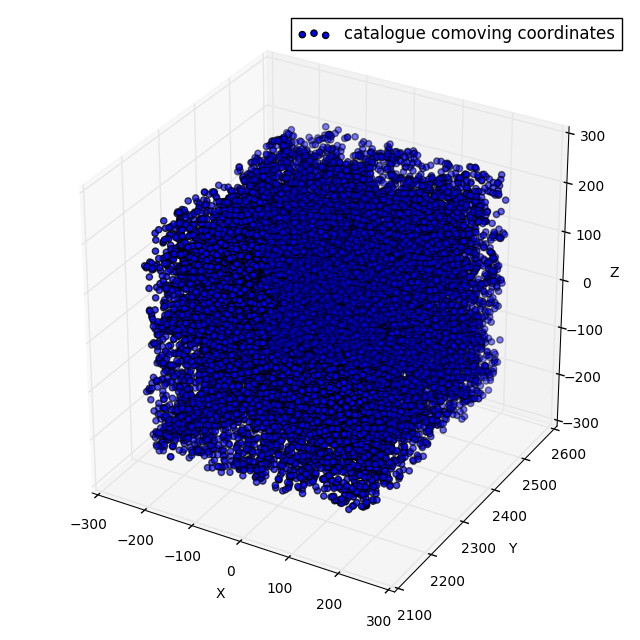

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8,8))

ax = fig.gca(projection='3d')

x=[]
y=[]
z=[]
for i in range(catalogue.nObjects()):
    x.append(catalogue.xx(i))
    y.append(catalogue.yy(i))
    z.append(catalogue.zz(i))

ax.scatter(x, y, z, label="catalogue comoving coordinates")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

* construct the **random catalogue** (with cubic geometry)

In [7]:
N_R = 1 # random/object ratio
random_catalogue = cbl.Catalogue(cbl.EnumTypes._createRandom_box_, catalogue, N_R)

overplot the random coordinates to the catalogue ones

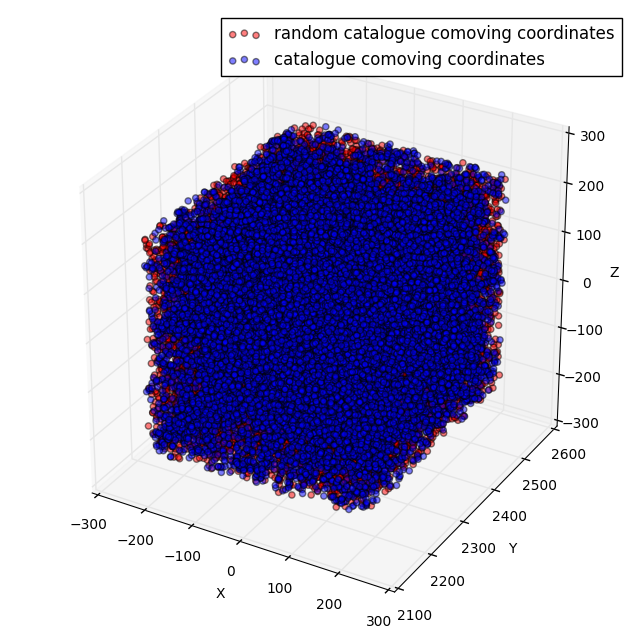

In [8]:
fig = plt.figure(figsize=(8,8))

ax = fig.gca(projection='3d')

xr=[]
yr=[]
zr=[]
for i in range(random_catalogue.nObjects()):
    xr.append(random_catalogue.xx(i))
    yr.append(random_catalogue.yy(i))
    zr.append(random_catalogue.zz(i))

       
ax.scatter(xr, yr, zr, c="red", alpha=0.5, label="random catalogue comoving coordinates") 
ax.scatter(x, y, z, c="blue", alpha=0.5, label="catalogue comoving coordinates")

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.legend()
plt.show()

## --- measure the monopole of the two-point correlation function ---
  
* set the **binnig** parameters

In [9]:
rMin = 1.   # minimum separation 
rMax = 50.  # maximum separation 
nbins = 20  # number of bins
shift = 0.5 # spatial shift used to set the bin centre 

* create the **object** used to measure the two-point correlation function

In [10]:
TwoP = cbl.TwoPointCorrelation1D_monopole(catalogue, random_catalogue, cbl.EnumTypes._logarithmic_, rMin, rMax, nbins, shift)

* **measure** the two-point correlation function

In [11]:
TwoP.measure(cbl.EnumTypes._Poisson_, dir_pairs)

* **store** the output data

In [12]:
file_xi = "xi.dat"
TwoP.write(dir_output, file_xi)

## --- plot the results ---

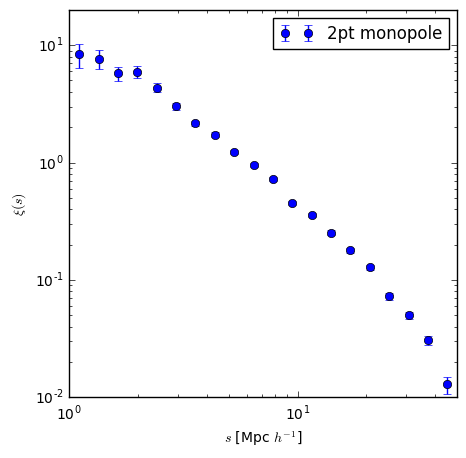

In [14]:
fig, ax = plt.subplots(figsize=(5,5))

ax.set_axisbelow(True)

ax.set_xscale('log', nonposx='clip')
ax.set_yscale('log', nonposy='clip')

ax.set_xlim(1, 50)
ax.set_ylim(0.01, 20)

ax.errorbar(TwoP.xx(), TwoP.xi1D(), TwoP.error1D(), fmt='o', color='blue', label="2pt monopole")

ax.set_xlabel('$s$ [Mpc $h^{-1}$]')
ax.set_ylabel('$\\xi(s)$')
ax.legend(loc="upper right")
plt.show()